In [ ]:
! pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 33.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=956f8f08076d28556db17bd7c0cad8e3b9e418c781e60ade4a0ebdd401bf6026
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=d274a67656416f28f9091e2531d926235cddd0a7514511734f83ac645c3c598c
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


### Lo primero es cargar los datos

# PCA + K-MEANS

Hacemos PCA para poder ver en dos dimensiones como se distribuyen los clusters.

Se podría usar otro algoritmo de clustering, el método es el mismo

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
sns.set() #hace que los gráficos queden más bonitos

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Escalamos con $\frac { { x }-\mu  }{ \sigma  } $

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Hacemos PCA de 2 componentes

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
type(pca)

sklearn.decomposition._pca.PCA

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9580097536148197

El resultado anterior te dice que % de varianza explica cada componente, se nota que IRIS está trucada porque casi explica el 100 %

In [ ]:
pd.DataFrame(pca.components_,columns=features,index = ['principal component 1', 'principal component 2']).transpose()

,principal component 1,principal component 2
sepal length,0.522372,0.372318
sepal width,-0.263355,0.925556
petal length,0.581254,0.021095
petal width,0.565611,0.065416


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### Dibujamos las dos componentes y un color cada target
Esto vale de ejemplo, pero tú lo que quieres es que te dibuje los clusters

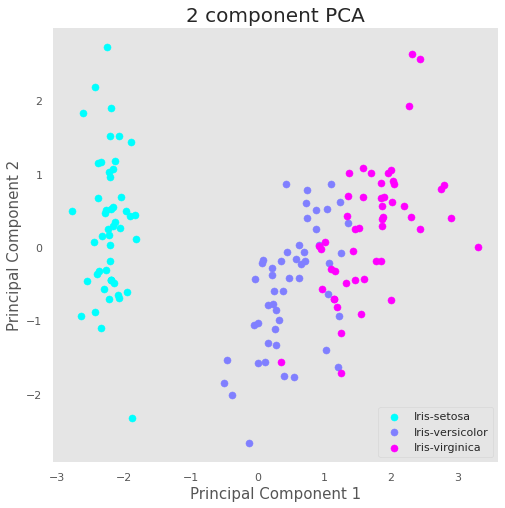

In [ ]:

plt.style.use('ggplot')
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = plt.cm.cool(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
import umap

In [ ]:
umap_RD = umap.UMAP(n_neighbors=30,
                      min_dist=0.0,
                      n_components=2,
                      random_state=42,
                      metric='correlation').fit_transform(x)

In [ ]:
np.unique(pd.factorize(finalDf.target)[0])

array([0, 1, 2])

In [ ]:
np.unique(finalDf.target)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
umapDF = pd.DataFrame(data = umap_RD
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
umapDF.head()

,principal component 1,principal component 2
0,-3.526664,10.155718
1,-3.316432,9.894382
2,-3.330889,8.659029
3,-3.144799,8.198817
4,-3.210672,9.659895


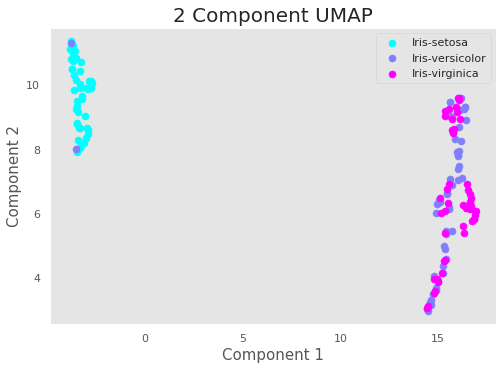

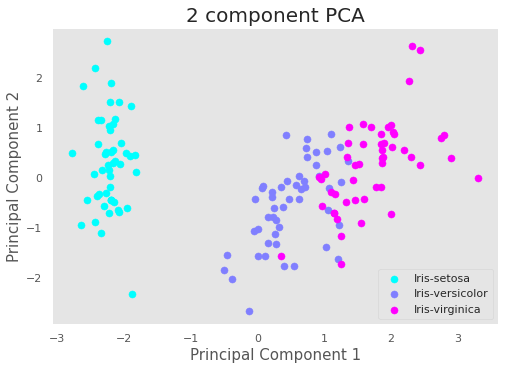

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (8,12))
ax = fig.add_subplot(2,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 Component UMAP', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = plt.cm.cool(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(umapDF.loc[indicesToKeep, 'principal component 1']
               , umapDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



plt.style.use('ggplot')
fig = plt.figure(figsize = (8,12))
ax = fig.add_subplot(2,1,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = plt.cm.cool(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Ahora con clustering

In [ ]:
from sklearn.cluster import KMeans
num_cluster = 5
kmeans = KMeans(n_clusters=num_cluster).fit(x)
kmeans_PC = KMeans(n_clusters=num_cluster).fit(principalDf)

In [ ]:
finalDf_kmeans = principalDf.copy()
finalDf_kmeans['cluster'] = kmeans.labels_

In [ ]:
finalDf_kmeans.head(10)



,principal component 1,principal component 2,cluster
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,2
2,-2.367950,-0.318477,2
3,-2.304197,-0.575368,2
4,-2.388777,0.674767,0
5,-2.070537,1.518549,0
6,-2.445711,0.074563,2
7,-2.233842,0.247614,2
8,-2.341958,-1.095146,2
9,-2.188676,-0.448629,2


In [ ]:
import numpy as np
np.sort(finalDf_kmeans.cluster.unique()) #para que sepas que tienes los targets



array([0, 1, 2, 3, 4], dtype=int32)

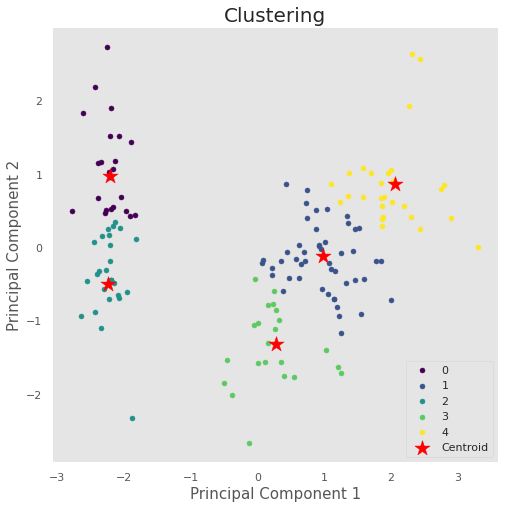

In [ ]:
targets = np.sort(finalDf_kmeans.cluster.unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(targets)))
#https://matplotlib.org/examples/color/colormaps_reference.html
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Clustering', fontsize = 20)
plt.style.use('ggplot')

for target, color in zip(targets,colors):
    indicesToKeep = finalDf_kmeans['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 25)
ax.scatter(kmeans_PC.cluster_centers_[:, 0],
            kmeans_PC.cluster_centers_[:, 1], marker='*', s=250,
            color='Red', label='Centers')    
ax.legend(np.append (targets, ["Centroid"]))

ax.grid()

In [ ]:
targets

array([0, 1, 2, 3, 4])

## Método del Codo

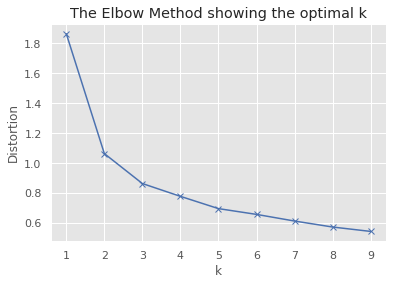

In [ ]:

from scipy.spatial.distance import cdist
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.style.use('ggplot')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Método de Silhouette

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.580184463257396
For n_clusters = 3 The average silhouette_score is : 0.46214947389312017
For n_clusters = 4 The average silhouette_score is : 0.38686030299599405
For n_clusters = 5 The average silhouette_score is : 0.34478573455929096
For n_clusters = 6 The average silhouette_score is : 0.3259365058730077
For n_clusters = 7 The average silhouette_score is : 0.3346062225960434


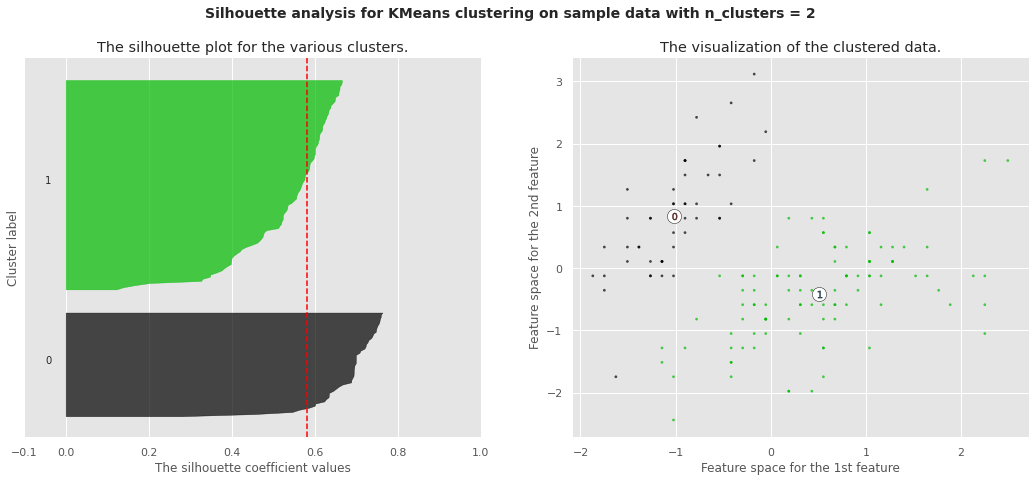

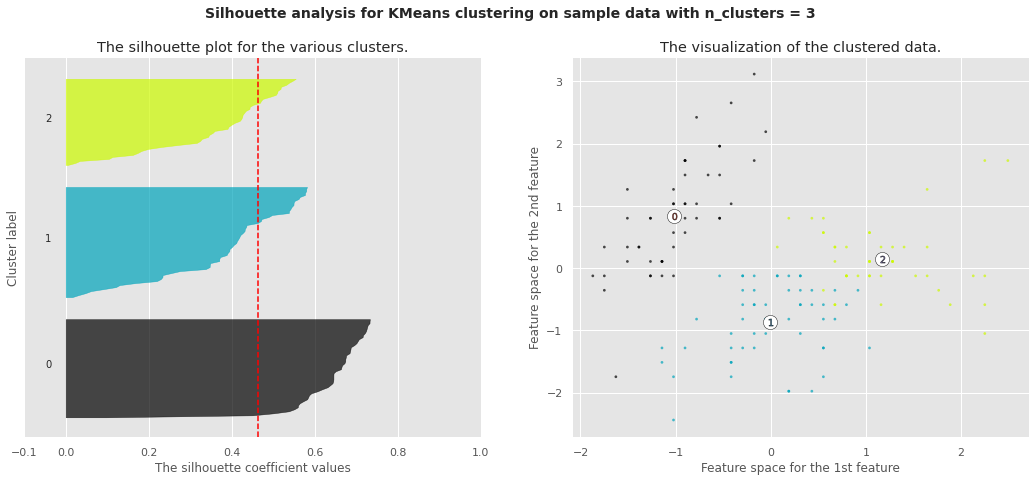

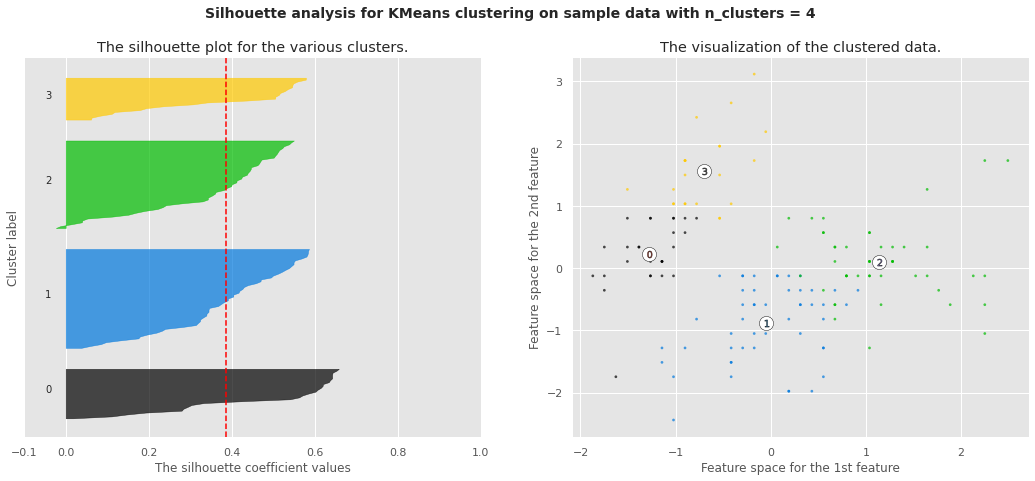

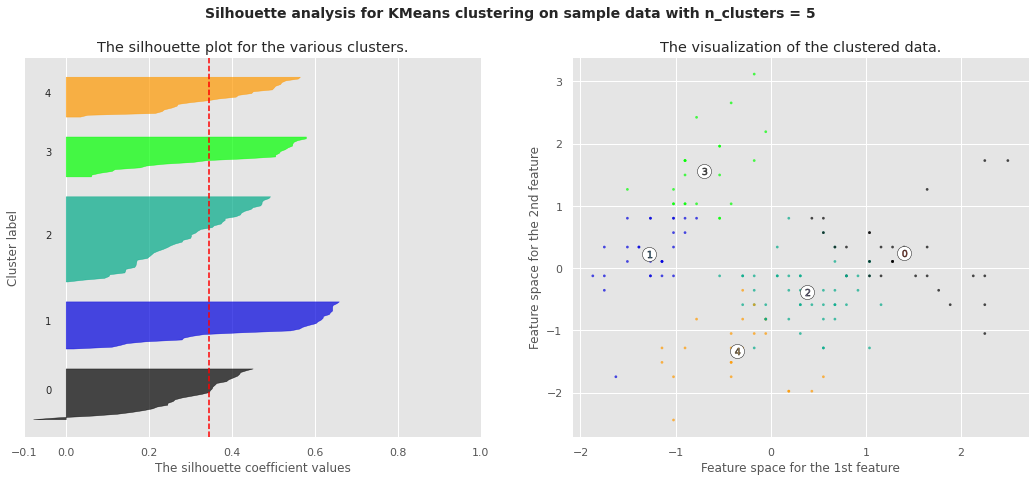

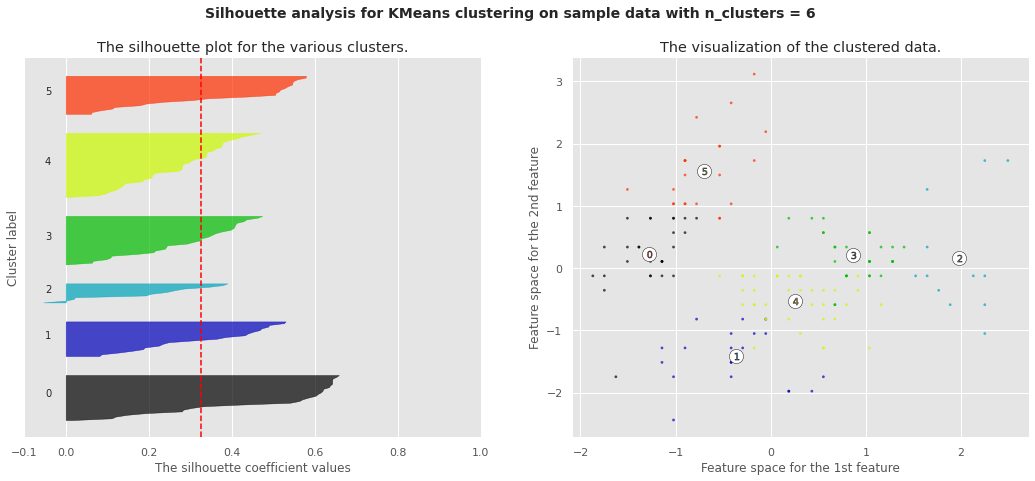

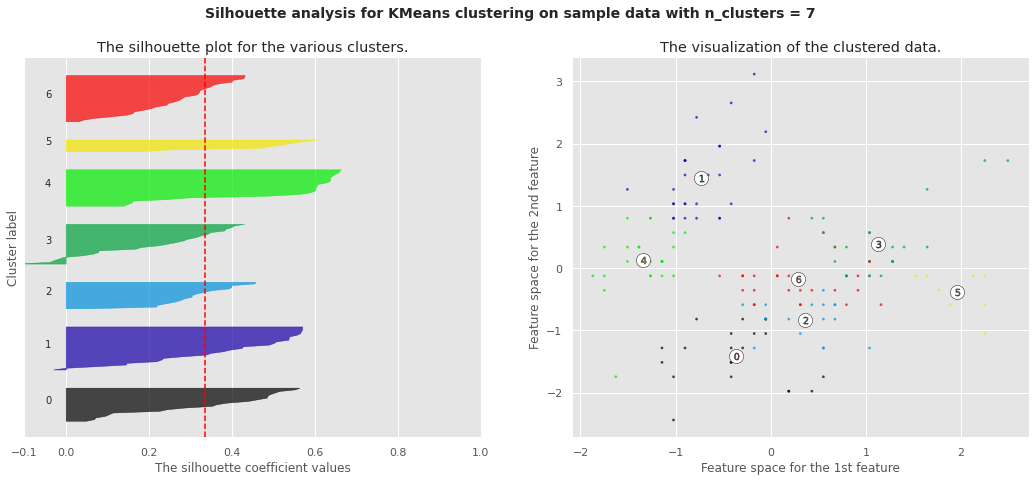

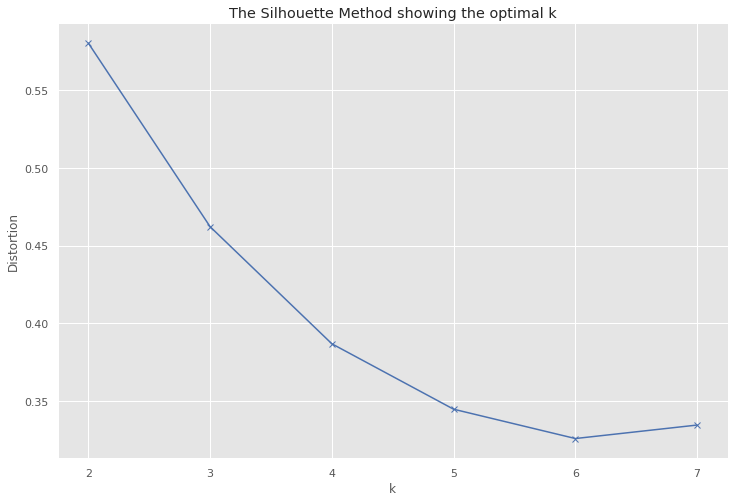

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
plt.style.use('ggplot')
range_n_clusters = range(2,8)
sample_silhouette_list =[]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    sample_silhouette_list.append(silhouette_avg)

    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



# Plot the silhouette

plt.style.use('ggplot')
plt.figure(figsize = (12,8))
plt.plot(range (2,len(sample_silhouette_list)+2), sample_silhouette_list, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Silhouette Method showing the optimal k')
plt.show()